# 1. Introduction

The purpose of this notebook is to understand the customer segmentation of a mall so that the marketing team can form strategies around it.

The data is provided by Udemy for the purpose of understanding how customer segmentation is done.

# 2. Table of Contents

# 3. Analysis

## 1.bold text Configurations

### 1.1 - Libraries

In [ ]:
pip install -U pandas-profiling

In [ ]:
# General
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling import ProfileReport
from scipy.cluster.hierarchy import dendrogram, ward, single

# Data Preparation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn import cluster


### 1.2 - Set up Notebook

#### A - Visualizations

In [ ]:
%matplotlib inline

#### B - Google Drive

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('dbscan_lab_helper.py','wb').write(src)

Saving dbscan_lab_helper.py to dbscan_lab_helper.py


2801

In [ ]:
import dbscan_lab_helper as helper

In [ ]:
cd "gdrive/MyDrive/Machine Learning/Portfolio/1 - Mall Customer Segmentation"

/content/gdrive/MyDrive/Machine Learning/Portfolio/1 - Mall Customer Segmentation


### 1.3 - Data

In [ ]:
data = pd.read_csv('input/Mall_Customers.csv')

### 1.4 - Functions

In [ ]:
def dataframe_d(df):
  '''
  Input: Dataframe
  Output: Get basic information on the dataframe 
  '''

  first_five_rows = df.head()
  data_shape = df.shape
  data_types = df.dtypes
  null_values = df.isnull().sum()
  numeric_columns = df.select_dtypes([np.number]).columns.to_list()
  columns = list(df)
  categorical_columns = []

  for i in columns:
    if i not in numeric_columns:
      categorical_columns.append(i)
    else:
      None


  print('The shape of the dataframe:',data_shape)
  print('\nCategorical columns:',len(categorical_columns))
  print(categorical_columns)
  print('\nNumeric columns:',len(numeric_columns))
  print(numeric_columns)
  print('\nThe null values in columns:')
  print(null_values)
  print('\nFirst five rows of the dataframe:')
  print(first_five_rows)
  print('\nThe data types of columns:')
  print(data_types)

In [ ]:
def get_numerical_columns(df):
  numeric_columns = df.select_dtypes([np.number]).columns.to_list()
  return numeric_columns



## 4. Primary Data Exploration 

### 4.1. Basic Information

In [ ]:
dataframe_d(data)

The shape of the dataframe: (200, 5)

Categorical columns: 1
['Gender']

Numeric columns: 4
['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

The null values in columns:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

First five rows of the dataframe:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

The data types of columns:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dt

### 4.2 - Detailed EDA

In [ ]:
profile = data.profile_report(title='Mall Segmentation Report')
profile.to_file(output_file="mall_segmentation.html")


Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.3 - Conclusions

1. The only column that must be encoded is 'Gender'
2. There are no skewed columns to transform

## 5. Data Preparation

In [ ]:
data_encoded = pd.get_dummies(data)

### 1. Normalize numerical columns

In [ ]:
scaler = MinMaxScaler()
numerical_columns = get_numerical_columns(data)

In [ ]:
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
data_copy = data

In [ ]:
ss = StandardScaler()
numerical_columns = get_numerical_columns(data)

In [ ]:
data_copy[numerical_columns] = ss.fit_transform(data_copy[numerical_columns])

In [ ]:
data_copy

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,Male,-1.424569,-1.738999,-0.434801
1,-1.706091,Male,-1.281035,-1.738999,1.195704
2,-1.688771,Female,-1.352802,-1.700830,-1.715913
3,-1.671450,Female,-1.137502,-1.700830,1.040418
4,-1.654129,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,Female,-0.276302,2.268791,1.118061
196,1.671450,Female,0.441365,2.497807,-0.861839
197,1.688771,Male,-0.491602,2.497807,0.923953
198,1.706091,Male,-0.491602,2.917671,-1.250054


### 2. Encode categorical columns

In [ ]:
data_prepared = pd.get_dummies(data)

## 6. Data Exploration - Secondary

### 1. Show prepared data

In [ ]:
data_prepared.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.000000,0.019231,0.000000,0.387755,0,1
1,0.005025,0.057692,0.000000,0.816327,0,1
2,0.010050,0.038462,0.008197,0.051020,1,0
3,0.015075,0.096154,0.008197,0.775510,1,0
4,0.020101,0.250000,0.016393,0.397959,1,0


### 2. Clustered representation of data

#### A. Using Ward algorithm

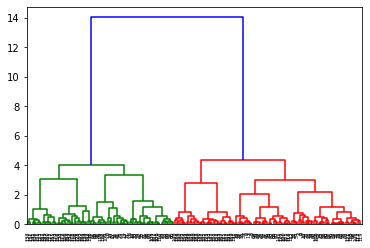

In [ ]:
linkage_matrix_ward = ward(data_prepared)
dendrogram(linkage_matrix_ward)
plt.show()

#### B. Using Single Linkage

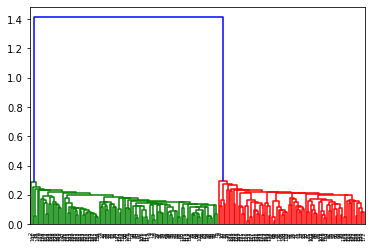

In [ ]:
linkage_matrix_single = single(data_prepared)
dendrogram(linkage_matrix_single)
plt.show()

### 3. Conclusion

1. The data is inherently divided into two clusters

## 7. Modeling

In [ ]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(data_prepared)
    wcss.append(kmeans.inertia_)

NameError: ignored